# Tutorial 8 - Structure Discovery

In class, we covered three different clustering algorithms (K-Means Clustering, Spectral Clustering, and Hierarchical Agglomerative Clustering) and different heuristics for choosing the optimal number of clusters (Elbow method, Silhouette, BIC, eigengap, dendrogram). 

In this tutorial, you will get hands-on experience on the three algorithms and explore the factors that influence the heuristics to choose the optimal number of clusters. 

**Learning Objectives**

- Understanding each Clustering Algorithm and its assumptions.
- Exploring the different heuristics and their robustness.

**Notes**

- Unless otherwise stated, you may use any existing libraries and methods to solve the tasks. 



In [2]:
# Add imports here
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='rainbow')
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
from sklearn.datasets import make_blobs, make_circles,make_moons

### BEGIN SOLUTION
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='rainbow')
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
from sklearn.datasets import make_blobs, make_circles,make_moons

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph

from scipy.sparse.csgraph import laplacian
from scipy import linalg
from scipy.cluster.hierarchy import dendrogram

from scipy.spatial import distance
### END SOLUTION
SEED = 111

## 0. Simulated Data
---
One of the main objectives of this tutorial is to explore clustering algorithms applied to different datasets. In the next cell, we are generating 4 different datasets (blobs, circles, moons, and ovals). These are just a few examples of datasets that can be explored in the following questions.

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

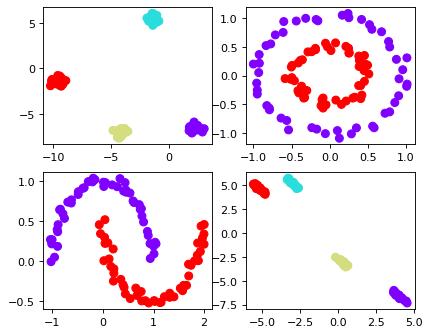

In [3]:
n_samples = 100
clusters = 4
X_blobs, y_blobs = make_blobs(n_samples=n_samples,centers = clusters,
                  cluster_std = 0.3, random_state=SEED)
X_circles, y_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
X_moons, y_moons = make_moons(n_samples=n_samples, noise=.05)

transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_trans = np.dot(X_blobs, transformation)
y_trans = y_blobs

fig = plt.figure(figsize=(6, 5), dpi=80)
plt.subplot(2, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, c = y_blobs)
plt.subplot(2, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=50, c = y_circles)
plt.subplot(2, 2, 3)
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=50, c = y_moons)
plt.subplot(2, 2, 4)
plt.scatter(X_trans[:, 0], X_trans[:, 1], s=50, c = y_trans)

## 1. K-Means Clustering
---
In this tutorial, we will use simulated data to understand the behavior of different clustering algorithms and the heuristics to choose the optimal number of clusters. Let’s start by exploring K-Means. 

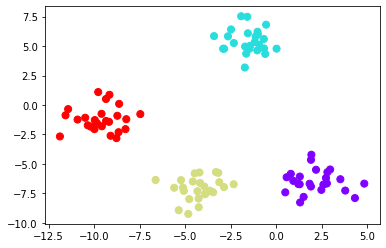

In [4]:
n_samples = 100
X, y = make_blobs(n_samples=n_samples,centers = 4,
                  cluster_std = 1, random_state=SEED)
plt.scatter(X[:, 0], X[:, 1], s=50, c = y)

### 1.1 Cluster the data using K-Means and plot the resulting clusters 

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

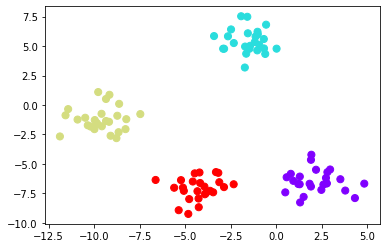

In [5]:
### BEGIN SOLUTION
kmeans = KMeans(n_clusters = 4, random_state = SEED)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)
### END SOLUTION

### 1.2 Optimal number of clusters
As seen in class there are several heuristics to determine the optimal number of clusters. In this tutorial, we will compare them and analyze how they behave with various datasets, variations within the clusters, and the number of samples. But first, we will calculate the heuristics individually. 

#### 1.2.1 Elbow method

In the elbow method, we want to choose k* such that adding another cluster does not lead to a much better model of the data. We do this by measuring the distortion  (in-cluster variance) defined as: 
$$
D=\sum_{n}\left(d\left(\boldsymbol{m}{\widehat{\boldsymbol{k}}^{n}, \boldsymbol{x}{\boldsymbol{n}}}\right)\right)^{2}
$$
Your task is to complete the function plot_distortion. Plot the distortion on the y-axis and the number of clusters in the x-axis 

**Challenge**: Compute the distortion using the [lecture notes](https://moodle.epfl.ch/mod/resource/view.php?id=1143936)
(Slide 31 Week 6)

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

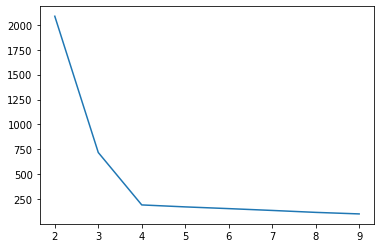

In [6]:
def plot_distortion(n_clusters_list, X):
    """
    Plot the distortion (in-cluster variance) on the y-axis and 
    the number of clusters in the x-axis 
    
    :param n_clusters_list: List of number of clusters to explore
    :param X: np array of data points 
    """
    ### BEGIN SOLUTION
    distortion_list = []
    for n in n_clusters_list:
        kmeans = KMeans(n_clusters=n, random_state=SEED).fit(X)
        distortion = kmeans.inertia_
        distortion_list.append(distortion)

    plt.plot(n_clusters_list, distortion_list)
    ### END SOLUTION
    
    
n_clusters_list = range(2,10)    
plot_distortion(n_clusters_list, X)

#### 1.2.2 Average Silhouette Width

Another heuristic seen in class was the Silhouette width which measures how similar a data point is to its own cluster (cohesion) compared to other clusters. Your task is to complete the function plot_silhouette. Plot the silhouette score on the y-axis and the number of clusters in the x-axis. 

**Challenge**: Compute the silhouette score using the [lecture notes](https://moodle.epfl.ch/mod/resource/view.php?id=1143936)  (Slide 33 Week 6)



<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

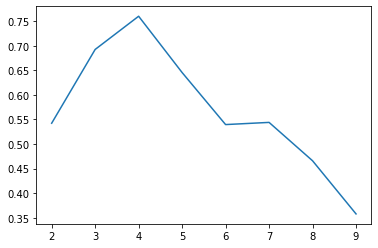

In [7]:
def plot_silhouette(n_clusters_list, X):
    """
    Plot the silhouette score on the y-axis and
    the number of clusters in the x-axis
    :param n_clusters_list: List of number of clusters to explore
    :param X: np array of data points 
    """
    ### BEGIN SOLUTION
    silhouette_list = []
    for n in n_clusters_list:
        kmeans = KMeans(n_clusters=n, random_state=SEED)
        y_pred = kmeans.fit_predict(X)
        silhouette = silhouette_score(X, y_pred)
        silhouette_list.append(silhouette)

    plt.plot(n_clusters_list, silhouette_list)
    ### END SOLUTION


plot_silhouette(n_clusters_list, X)

#### 1.2.3 BIC

The third heuristic seen in class for K-Means is the Bayesian Information Criterion. Your task is to complete the functions compute_bic using the [lecture notes](https://moodle.epfl.ch/mod/resource/view.php?id=1148083) 
(Slide 4 Week 9) and the plot the BIC with the function plot_bic.
You might find [these](https://github.com/bobhancock/goxmeans/blob/master/doc/BIC_notes.pdf) notes useful to optimize your code: 


In [44]:
def compute_bic(kmeans, X):
    """
    Computes the BIC metric

    :param kmeans: clustering object from scikit learn
    :param X: np array of data points
    :return: BIC
    """
    ### BEGIN SOLUTION
    # Adapted from: https://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels = kmeans.labels_
    # number of clusters
    k = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    # size of data set
    N, D = X.shape

    # compute variance for all clusters beforehand
    cl_var = (1.0 / (N - k) / D) * sum([sum(distance.cdist(X[np.where(labels == i)], \
                                    [centers[0][i]],'euclidean') ** 2) for i in range(k)])


    LL = np.sum([n[i] * np.log(n[i]) -
                  n[i] * np.log(N) -
                  ((n[i] * D) / 2) * np.log(2 * np.pi * cl_var) -
                  ((D / 2)*(n[i] - 1))  for i in range(k)])
    
    d = (k - 1) + 1 + k * D
    const_term = (d / 2) * np.log(N)
    
    BIC = LL - const_term
    
    ### END SOLUTION
    return BIC


X, y = make_blobs(n_samples=100,centers = 4,
                  cluster_std = 1, random_state=SEED)
kmeans = KMeans(n_clusters = 4, random_state = SEED).fit(X)
bic = compute_bic(kmeans, X)

<Response [200]>

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

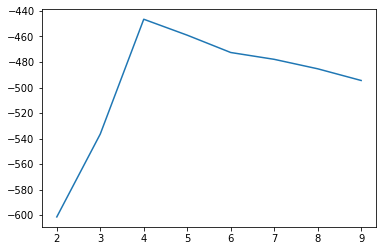

In [41]:
def plot_bic(n_clusters_list, X):
    """
    Plot the BIC on the y-axis and the number of clusters in the x-axis
    :param n_clusters_list: List of number of clusters to explore
    :param X: np array of data points 
    """
    ### BEGIN SOLUTION
    bic_list = []
    for n in n_clusters_list:
        kmeans = KMeans(n_clusters=n, random_state=SEED).fit(X)
        bic = compute_bic(kmeans, X)
        bic_list.append(bic)

    plt.plot(n_clusters_list, bic_list)
    ### END SOLUTION


plot_bic(n_clusters_list, X)

#### 1.2.4 Plot all heuristics
Plot all heuristics. Now that you have calculated all three heuristics, your task is to complete the function get_heuristics_kmeans that plots the three heuristics

In [42]:
def plot_metrics(n_clusters_list, metric_dictionary):
    """
    Plots metric dictionary (auxilary function)
    [Optional]
    :param n_clusters_list: List of number of clusters to explore
    :param metric_dictionary: 
    :return: 
    """
    ### BEGIN SOLUTION
    fig = plt.figure(figsize=(12, 10), dpi=80)
    i = 1

    for metric in metric_dictionary.keys():
        plt.subplot(2, 2, i)
        plt.plot(n_clusters_list, metric_dictionary[metric], '-o')
        plt.xlabel('Number of clusters')
        plt.ylabel(metric)
        plt.xticks(n_clusters_list)
        i += 1
    ### END SOLUTION


<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

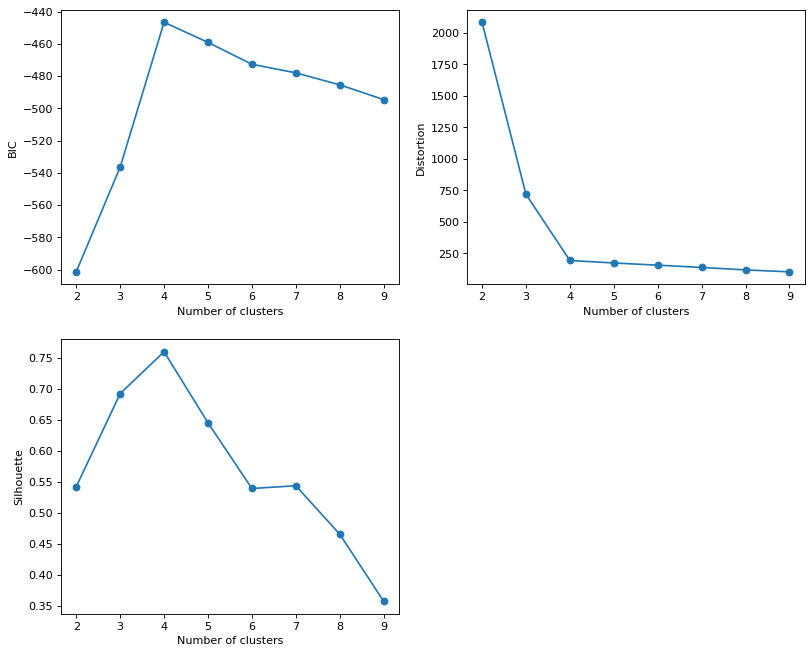

In [43]:
def get_heuristics_kmeans(X, n_clusters_list = range(2,10)):
    """
    Calculates heuristics for optimal number of clusters with K-Means 
    
    :param n_clusters_list: List of number of clusters to explore
    :param X: np array of data points 
    """
    ### BEGIN SOLUTION
    silhouette_list = []
    distortion_list = []
    bic_list = []
   
    for n in n_clusters_list:
        kmeans = KMeans(n_clusters=n, random_state=SEED)
        y_pred = kmeans.fit_predict(X)

        silhouette = silhouette_score(X, y_pred)
        silhouette_list.append(silhouette)

        distortion = kmeans.inertia_
        distortion_list.append(distortion)

        bic = compute_bic(kmeans, X)
        bic_list.append(bic)
        
    metric_dictionary = {'BIC': bic_list,
                         'Distortion': distortion_list,
                         'Silhouette': silhouette_list}
    
    plot_metrics(n_clusters_list, metric_dictionary)
    ### END SOLUTION

get_heuristics_kmeans(X, n_clusters_list)

### 1.3 Heuristic analysis
Your task is to play with the generated data and understand the robustness and sensitivity of each heuristic and answer the following questions:
- How does the standard deviation affect each heuristic? Which heuristics are more robust to variation? Play with the standard deviation of the clusters (cluster_std)
- How does the optimal number of clusters vary with the number of data points? Play with the number of samples (n_samples)
- How does the algorithm behave with different data sets? Why? What are the assumptions of K-means? (See lecture notes) 


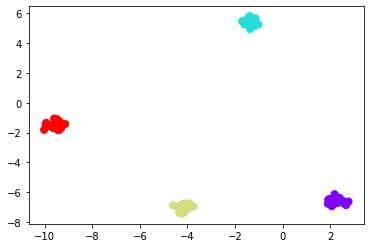

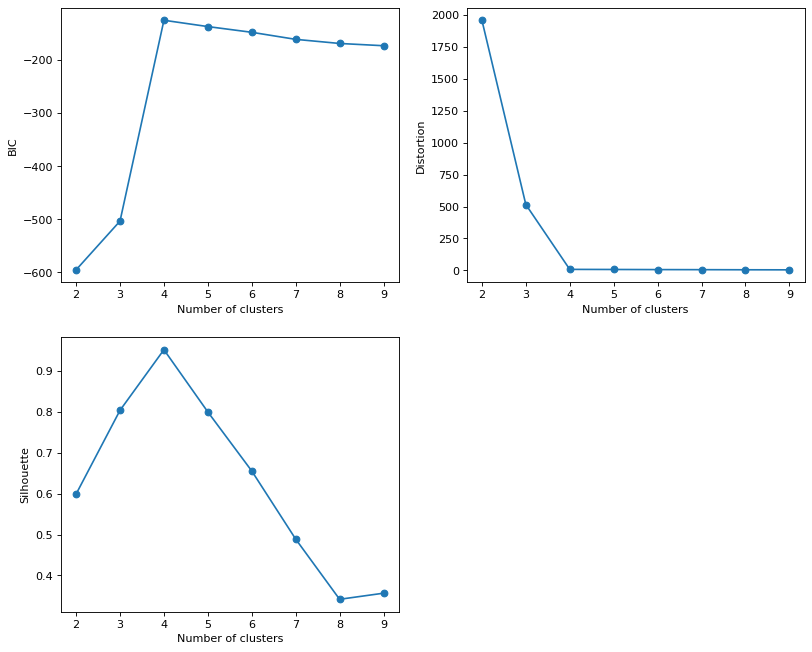

In [45]:
n_samples = 100
clusters = 4
X, y = make_blobs(n_samples=n_samples,centers = clusters,
                  cluster_std =0.2, random_state=SEED)

fig = plt.subplots(squeeze=False)
ax1 = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
ax2 =  get_heuristics_kmeans(X)



## 2. Spectral Clustering

### 2.1 Cluster the data using Spectral Clustering and plot the resulting clusters 


<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

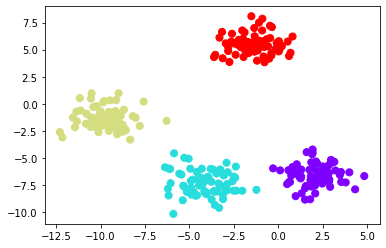

In [14]:
n_samples = 300
clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=clusters,
                  cluster_std=1, random_state=SEED)

### BEGIN SOLUTION
spectral = SpectralClustering(n_clusters=clusters, 
                              random_state=SEED)
y_pred = spectral.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_pred)
### END SOLUTION


### 2.2 Build Spectral Clustering 
Scikit learn has a well-optimized implementation of Spectral Clustering however we cannot access the intermediate steps. If we want to compute the distortion, BIC, and eigengap heuristic, we must implement it ourselves. Recall that Spectral Clustering is K-Means clustering in a transformed space. Your task is to follow the [lecture notes](https://moodle.epfl.ch/mod/resource/view.php?id=1143936) (Slide 46 Week 6) to complete the spectral_clustering function.

Compare your results to be ones obtained in 2.1.

In [15]:
def spectral_clustering(X, n_clusters):
    """
    Spectral clustering
    :param X: np array of data points
    :param n_clusters: number of clusters
    :return: tuple (kmeans, proj_X, eigenvals_sorted)
        WHERE
        kmeans scikit learn clustering object
        proj_X is np array of transformed data points
        eigenvals_sorted is np array with ordered eigenvalues 
        
    """
    ### BEGIN SOLUTION
    # Construct a similarity graph
    n_neighbors = 8
    connectivity = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity')
    adjacency_matrix = (1 / 2) * (connectivity + connectivity.T)

    # Compute the unnormalized graph Laplacian
    L = laplacian(csgraph=adjacency_matrix, normed=False)
    L = L.toarray()

    # Compute the first 𝑘 eigenvectors
    eigenvals, eigenvcts = linalg.eig(L)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)

    eigenvals_sorted_indices = np.argsort(eigenvals)
    eigenvals_sorted = eigenvals[eigenvals_sorted_indices]
    indices = eigenvals_sorted_indices[: n_clusters]
    proj_X = eigenvcts[:, indices.squeeze()]

    # Cluster the points using k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(proj_X)
    ### END SOLUTION

    return kmeans, proj_X, eigenvals_sorted

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

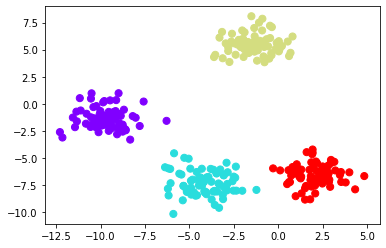

In [16]:
kmeans, proj_X, eigenvals_sorted  = spectral_clustering(X,  clusters)
y_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)

### 2.3 Optimal number of clusters

#### 2.3.1 Eigengap Heuristic
As seen during the lecture, for Spectral Clustering the Eigengap Heuristic can be used to choose k* so that the first k eigenvalues are very small ut k+1 is relatively large. Your task is to complete the function plot_eigengap

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

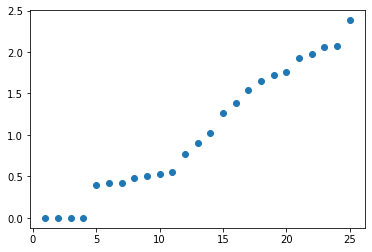

In [17]:
def plot_eigengap(eigenvals_sorted):
    """
    :param eigenvals_sorted: np array with ordered eigenvalues 
    """
    ### BEGIN SOLUTION
    first_eigenvalues = eigenvals_sorted[:25] 
    plt.scatter(range(1, len(first_eigenvalues) + 1), first_eigenvalues)
    ### END SOLUTION
    
plot_eigengap(eigenvals_sorted)

#### 2.3.2 Plot all heuristics
Similarly to what you did with K-Means, complete the function get_heuristics_spectral that plots the four heuristics


In [18]:
def plot_metrics(n_clusters_list, metric_dictionary):
    """
    Plots metric dictionary (auxilary function)
    [Optional]
    
    :param n_clusters_list: List of number of clusters to explore 
    :param metric_dictionary: 
    """
    ### BEGIN SOLUTION
    fig = plt.figure(figsize=(12, 10), dpi=80)
    i = 1

    for metric in metric_dictionary.keys():
        plt.subplot(2, 2, i)

        if metric == 'Eigengap':
            clusters = len(n_clusters_list)
            eigenvals_sorted = metric_dictionary[metric]
            plt.scatter(range(1, len(eigenvals_sorted[:clusters * 2]) + 1), eigenvals_sorted[:clusters * 2])
            plt.xlabel('Eigenvalues')
            plt.xticks(range(1, len(eigenvals_sorted[:clusters * 2]) + 1))
        else:
            plt.plot(n_clusters_list, metric_dictionary[metric], '-o')
            plt.xlabel('Number of clusters')
            plt.xticks(n_clusters_list)
        plt.ylabel(metric)
        i += 1
    ### END SOLUTION

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

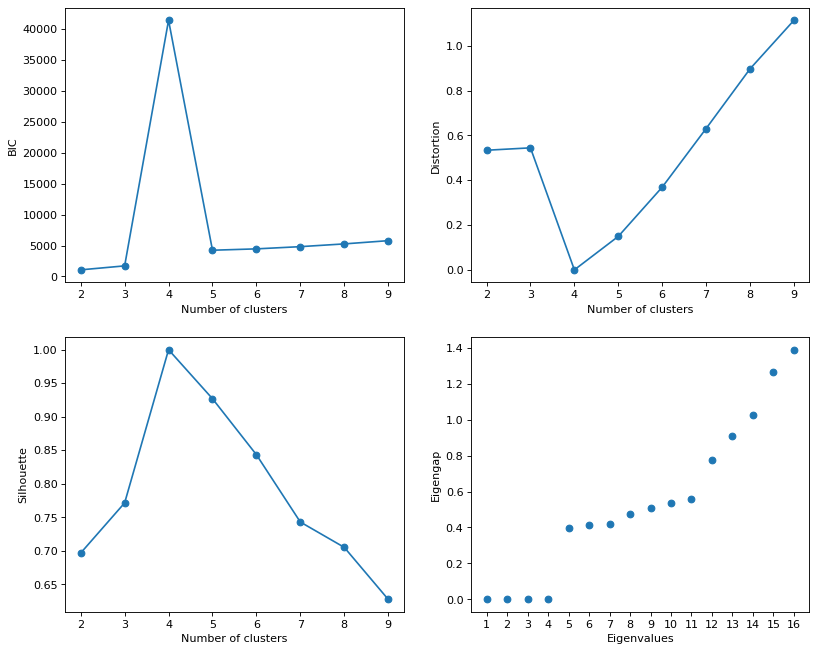

In [19]:
def get_heuristics_spectral(X, n_clusters_list=range(2, 8)):
    """
    Calculates heuristics for optimal number of clusters with Spectral Clustering
    
    :param X: np array of data points
    :param n_clusters_list: List of number of clusters to explore
    """
    ### BEGIN SOLUTION
    silhouette_list = []
    distortion_list = []
    bic_list = []
    eigengap_list = []

    for n in n_clusters_list:
        kmeans, proj_X, eigenvals_sorted = spectral_clustering(X, n)
        y_pred = kmeans.labels_

        if n == 1:
            silhouette = np.nan
        else:
            silhouette = silhouette_score(proj_X, y_pred)
        silhouette_list.append(silhouette)

        distortion = kmeans.inertia_
        distortion_list.append(distortion)

        bic = compute_bic(kmeans, proj_X)
        bic_list.append(bic)

    metric_dictionary = {'BIC': bic_list,
                         'Distortion': distortion_list,
                         'Silhouette': silhouette_list,
                         'Eigengap': eigenvals_sorted}

    plot_metrics(n_clusters_list, metric_dictionary)
    ### END SOLUTION

get_heuristics_spectral(X, n_clusters_list)

### 2.4 Heuristic analysis
Your task is to play with the generated data and understand the robustness and sensitivity of each heuristic
- How does the standard deviation affect each heuristic? Which heuristics are more robust to variation? Play with the standard deviation of the clusters (cluster_std)
- How does the optimal number of clusters vary with the number of data points? Play with the number of samples (n_samples)
- How does the algorithm behave with different data sets? Why? What are the assumptions of Spectral Clustering? (See lecture notes) 
- How is Spectral Clustering different from K-Means?


<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

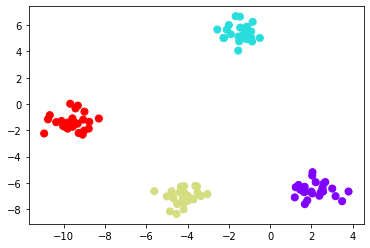

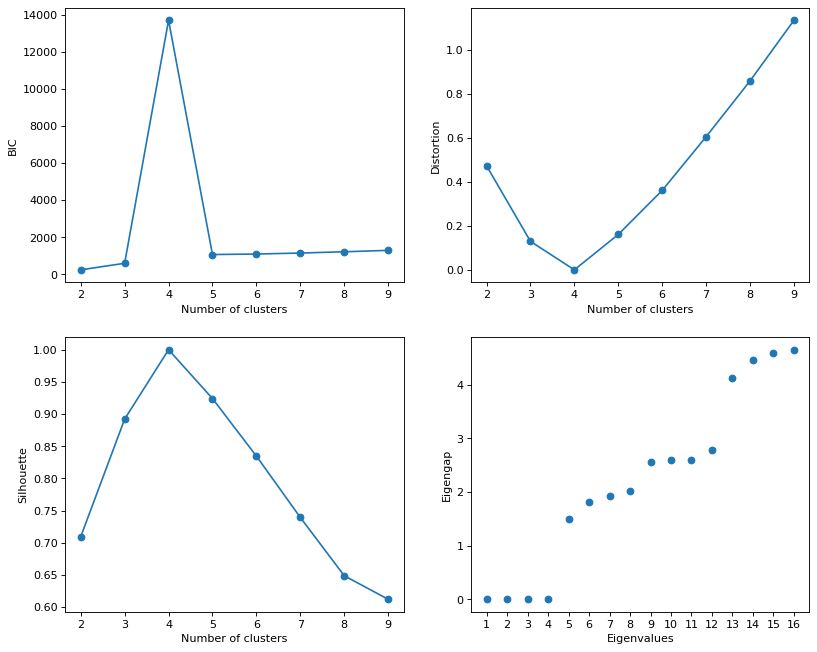

In [20]:
n_samples = 100
clusters = 4
X, y = make_blobs(n_samples=n_samples,centers = clusters,
                  cluster_std =0.6, random_state=SEED)

fig = plt.subplots(squeeze=False)
ax1 = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
ax2 =  get_heuristics_spectral(X, n_clusters_list)


## 3 Hierarchical Agglomerative Clustering

### 3.1 Cluster the data using Hierarchical Agglomerative Clustering and plot the resulting clusters

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

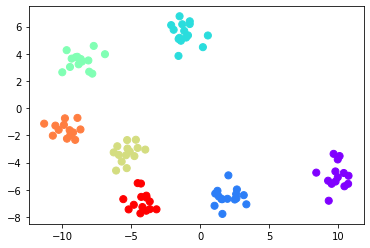

In [22]:
n_samples = 100
clusters = 7
X, y = make_blobs(n_samples=n_samples,centers = clusters,
                  cluster_std = 0.7, random_state=SEED)

### BEGIN SOLUTION
hierarchical = AgglomerativeClustering(n_clusters = clusters)
y_pred = hierarchical.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)
### END SOLUTION

### 3.2 Linkages
As seen in class there are different ways to identify the closest clusters (single, complete, average, centroid, ward). Your task is to explore how the different linkages behave with changes in the dataset (variance, shape, number of data points). What conclusions can you draw?

**Challenge** Compute the execution times. Which linkage is the fastest?

In [23]:
def compare_linkages(clusters, X):
    ### BEGIN SOLUTION
    linkage_list = ['single','average', 'complete', 'ward']

    fig = plt.figure(figsize=(7, 7), dpi=80)
    i = 1

    for link in linkage_list:
        plt.subplot(2, 2, i)
        hierarchical = AgglomerativeClustering(linkage= link, n_clusters = clusters)
        start_time = time.time() 
        y_pred = hierarchical.fit_predict(X)
        execution_time = time.time() - start_time
        plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)
        plt.title("link: {0}, execution time: {1}".format(link, round(execution_time,4)), fontsize = 8)
        i+=1 
    ### END SOLUTION

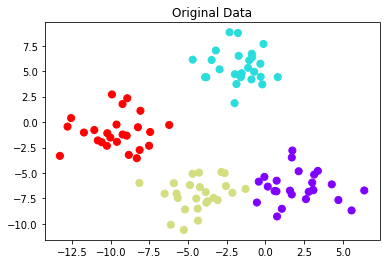

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [200]>

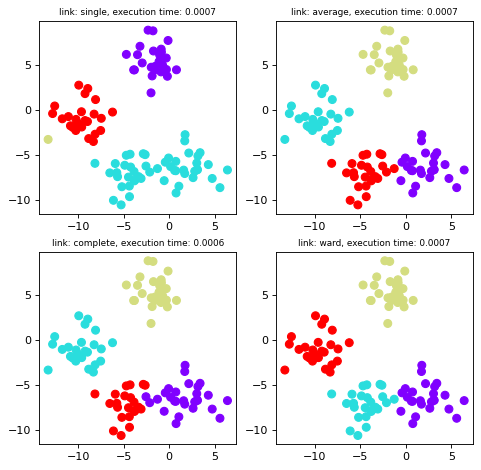

In [24]:
n_samples = 100
clusters = 4
X, y = make_blobs(n_samples=n_samples,centers = clusters,
                  cluster_std =1.6, random_state=SEED)


plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
plt.title('Original Data')
plt.show()

compare_linkages(clusters, X)

### 3.3 Dendrogram 
Visualize the Dendrogram.

**Hint:** Set the number of clusters to None. 

<string>:31: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


<Response [400]>

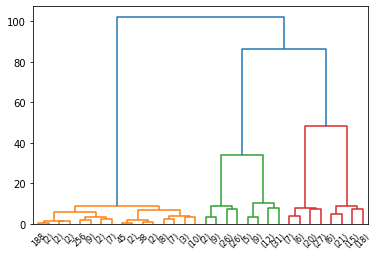

In [26]:
def plot_dendrogram(model):
    """
    Create linkage matrix and then plot the dendrogram
    
    :param model: clustering object from scikit learn
    """
    ### BEGIN SOLUTION
    # Adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, truncate_mode='level', p=4)
    ### END SOLUTION

clusters = 5
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=clusters,
                  cluster_std=1, random_state=SEED)

hierarchical = AgglomerativeClustering(distance_threshold=0,
                                       linkage='ward',
                                       n_clusters=None).fit(X)
plot_dendrogram(hierarchical)

### 3.4 Optimal number of clusters

Using the dendrogram we can find the optimal number of clusters. You must:
1. Locate the largest vertical line (without crossing any horizontal line) 
2. Draw a horizontal line just before the end of the largest vertical line
3. Count the number of vertical lines that the horizontal line from (2) intercepts
Your task is to explore how truth this holds with variations in the dataset.



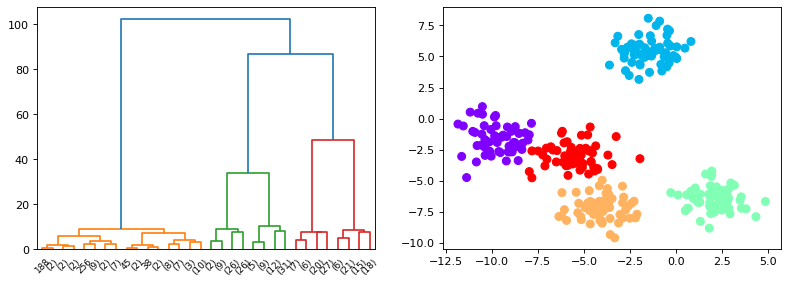

In [27]:
clusters = 5
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=clusters,
                  cluster_std=1, random_state=SEED)
#X = X_moons
hierarchical = AgglomerativeClustering(distance_threshold=0,
                                       linkage='ward',
                                       n_clusters=None).fit(X)

fig = plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1, 2, 1)
plot_dendrogram(hierarchical)


hierarchical = AgglomerativeClustering(linkage='ward',
                                       n_clusters=clusters).fit(X)
y_pred = hierarchical.fit_predict(X)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)


## Summary

In this tutorial, you used three different clustering algorithms (K-Means Clustering, Spectral Clustering, and Hierarchical Agglomerative Clustering) and hopefully learned the intuition behind different heuristics for choosing the optimal number of clusters (Elbow method, Silhouette, BIC, eigengap, dendrogram). 

**Lab discussion** 
In which situations would you use each algorithm? 